<strong><font color = "#1E074C" size = 6 fave = "arial"><u>ISP-ONE BROADBAND SERVICES.</u></font></strong>

<img src="https://www.tripleplay.in/images/broadband.jpg" width="1500" height = "500">
<font color = "#059DA5" >Image source : https://www.tripleplay.in/</font>

In [1]:
"""
Authors : 1. Narendrababu S(2019AH04022)
          2. Kolli Hrudhay (2019AH04040)
          3. Akshat Gupta (2019AH04001)
          4. Potturi Mourya Chandra (2019AH04120)
          
          
"""
        

'\nAuthors : 1. Narendrababu S(2019ah04022)\n          2. Kolli Hrudhay (2019AH04040)\n          3. Akshat Gupta (2019AH04001)\n          4. Potturi Mourya Chandra (2019AH04120)\n          \n          \n'

<strong><font color = "#9999ff" size = 3>The ISP-One is internet service provider offering internet services to users all over the country. They are concerned about customer churn and trying to understand which customers are likely to leave, so that they can make focused effort on customer retention.  
Main goal is to predict who are all leaving the ISP-ONE or shifting to other internet service provider, this is kind of a early prediction to prevent the customer churn.
The given data has the information about each customer in ISP-ONE.<br>
    Attribute details :<br> 
                      1. active_cust         :  1-active, 0-Attrited.
                      2. income              :  Monthly income of the customer.
                      3. months_on_network   :  Duration in months.
                      4. num_complaints      :  Number of complaints.
                      5. number_plan_changes :  Number of plan changes.
                      6. relocated           :  0-No, 1-yes/relocated.
                      7. monthly_bill        :  monthly bill of each customer.
                      8. technical_issues    :  issues per month.
                      9. speed_test_result   :  Internet speed of ISP-ONE.
    
active_cust is the attribute indicating whether the customer left or not, Since there are two class labels(Yes or No) it is a binary classification problem.
I will be using the classifier to predict the customer churn.
<br>
<font color = "#05EFF2" size = 5>Contents:</font><br>
one click on below:
1. [Data Preprocessing](#1.)
2. [Model Implementation](#2.)
3. [Model Evaluation](#3.)
   


In [2]:
# import required modules
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,precision_score,f1_score

# 1.
<U><strong><font color = "Red" size = 6> Data Preprocessing</font></strong></U><br>

One click on below :<br>
1.1. [Removing duplicates in the data.](#1.1)<br>
1.2. [Finding linear dependancy.](#1.2)<br>
1.3. [Central tendency and other stats](#1.3)<br>
1.4. [Handling noise/inconsistent data](#1.4)<br>
1.5. [Outlier Analysis](#1.5)<br>
1.6. [Check for a class imbalance problem](#1.6)<br>
1.7. [Normalization/scaling.](#1.7)


In [3]:
# import the data
data = pd.read_csv("../input/ISP_One_Attrition_Data_file.csv")

In [4]:
# First few rows of the data
data.head()

,active_cust,income,expenditure,months_on_network,Num_complaints,number_plan_changes,relocated,monthly_bill,technical_issues_per_month,Speed_test_result
0,0,1586,1268.8,85,4,1,0,121,4,85
1,0,1581,1264.8,85,4,1,0,133,4,85
2,0,1594,1275.2,82,4,1,0,118,4,85
3,0,1594,1275.2,82,4,1,0,123,4,85
4,1,1609,1287.2,80,4,1,0,177,4,85


# 1.1
<font color = "#DF12E9" size = 4> <u>Removing duplicates in the data </u>:- </font>

In [5]:
# Remove duplicates
data.drop_duplicates(subset=None, keep='first', inplace=True)
print("shape of the data after removing the duplicates", data.shape)

shape of the data after removing the duplicates (98551, 10)


In [6]:
# shape of the data
print("Number of rows :",data.shape[0])
print("Number of columns :",data.shape[1])
print("===============================================")
# check if there are any missing values in each attribute
print(data.isnull().any())
print("===============================================")
# check the number of samples and their data type
data.info()


Number of rows : 98551
Number of columns : 10
active_cust                   False
income                        False
expenditure                   False
months_on_network             False
Num_complaints                False
number_plan_changes           False
relocated                     False
monthly_bill                  False
technical_issues_per_month    False
Speed_test_result             False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
Int64Index: 98551 entries, 0 to 99999
Data columns (total 10 columns):
active_cust                   98551 non-null int64
income                        98551 non-null int64
expenditure                   98551 non-null float64
months_on_network             98551 non-null int64
Num_complaints                98551 non-null int64
number_plan_changes           98551 non-null int64
relocated                     98551 non-null int64
monthly_bill                  98551 non-null int64
technical_issues_per_month    98551 non-null int64
Speed_test_r

# 1.2
<font color = "#DF12E9" size = 4> <u>Finding linear dependancy between the attributes using Pearson Correlation </u>:-</font>

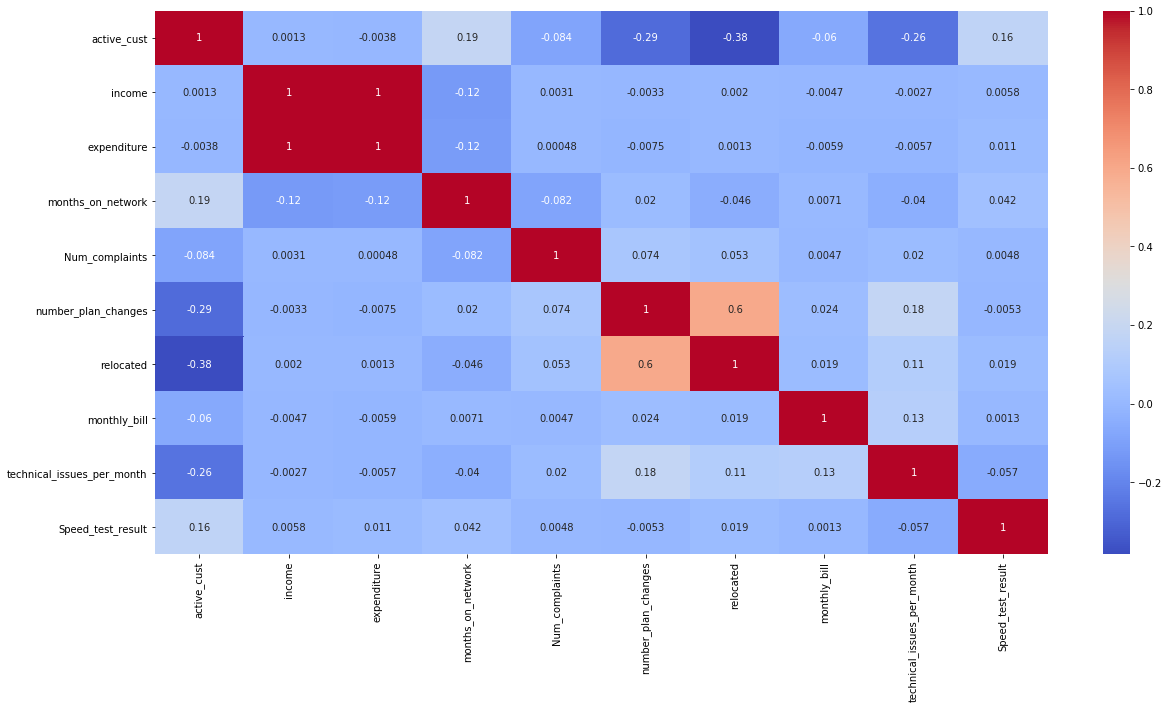

In [7]:
# Correlation matrix using standard pearson correlation --> Check for linear dependancy
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(method = "pearson"),annot = True,cmap="coolwarm")

<font color = "#00cccc" size = 5><u> Observations: </u></font><br>
<strong><font color = "#9999ff" size = 3>Let $r$  be the correlation coefficient between the selected attributes.<br>
If   $r>0$ : Attributes are positively correlated(One can be removed as redundant).<br>
If   $r<0$ : There is no linear dependancy.</font></strong>
<br>
<font color = "#9999ff" size = 3><strong>1. From the above correlation matrix, <font color = "#ff6699" size = 3>"income"</font> and <font color = "#ff6699" size = 3>"expenditure"</font> are positively correlated i.e <font color = "#ff6699">($r_{income,expenditure} = 1$)</font>. Hence one of the attribute can be removed as redundant. <br>
 2. Similarly, the attributes <font color = "#ff6699" size = 3>"relocated"</font> and <font color = "#ff6699" size = 3>"number_plan_changes"</font> are positively correlated <font color = "#ff6699">($r_{relocated,numberplanchanges} = 0.6$)</font>.</strong></font>

In [8]:
# Removing the linearly dependant variable(income)
cols = ["expenditure","months_on_network","Num_complaints","number_plan_changes","relocated","monthly_bill","technical_issues_per_month","Speed_test_result"]


# 1.3
<font color = "#DF12E9" size = 4> <u>Central tendency and other stats</u>:-</font>

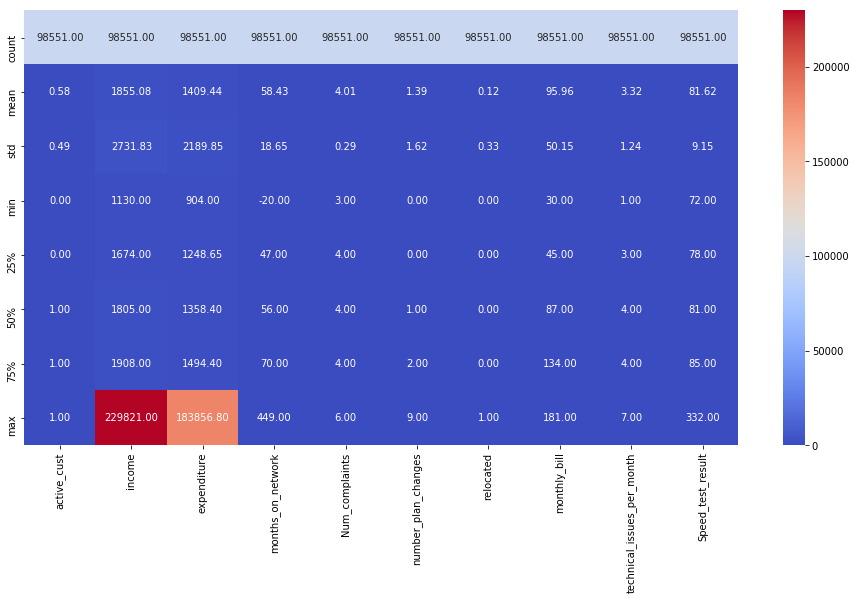

In [9]:
# statistics
plt.figure(figsize=(16,8))
sns.heatmap(data.describe(),fmt = ".2f",cmap = "coolwarm",annot = True)

<font color = "#00cccc" size = 5><u> Observations: </u></font>
<strong><font color = "#9999ff" size = 3>
1. Normalization is required as there is a large difference between each attribute mean value.
2. Outlier analysis and removal is required as there is a large difference between the max value and mean value of each attribute.
3. No missing values.
4. Inconsistent data in the months_on_network column(there are negative values). </font></strong>


# 1.4
<font color = "#DF12E9" size = 4> <u>Handling noise/inconsistent data </u>:-</font>

In [10]:
# removing negative values in the months_on_network attribute
data = data[data.months_on_network>0]
print("Number of rows and columns after removing negative values :",data.shape)

Number of rows and columns after removing negative values : (98140, 10)


# 1.5
<font color = "#DF12E9" size =4> <u>Outlier Analysis </u>:-</font>

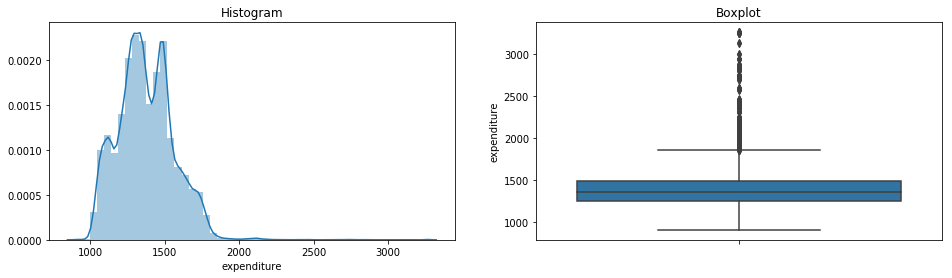

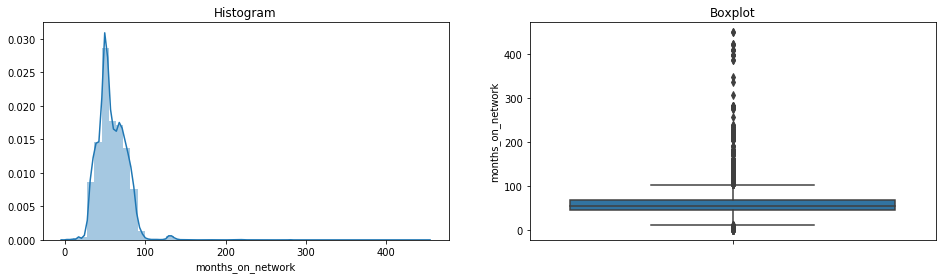

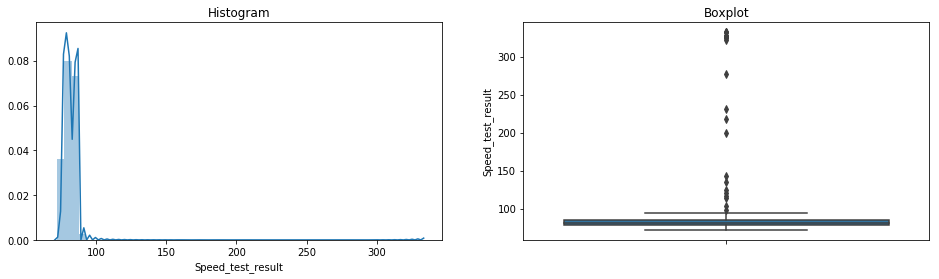

In [11]:
# outlier analysis
def plots(df,attrib):
    # this function takes two arguments (dataframe and attribute of interest)
    
    # define the figure size
    plt.figure(figsize = (16,4))
    
    # histogram
    plt.subplot(1,2,1)
    sns.distplot(df[attrib],bins = 50)
    plt.title("Histogram")
    
    # boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y = df[attrib])
    plt.title("Boxplot")
    plt.show()
plots(data,"expenditure")
plots(data,"months_on_network")
plots(data,"Speed_test_result")

<font color = "#00cccc" size = 5><u> Observations: </u></font>
<strong><font color = "#9999ff" size = 3>
1. All the three attributes visualized above have skewed distribution, therefore the right method to remove the outliers is IQR proximity measure.
2. Uppert_limit = (75th percentile)+(1.5 * IQR), Where IQR is the inter quartile range.
3. Lower_limit = (25th percentile)-(1.5 * IQR).</font></strong>



In [12]:
def find_skewed_boundaries(df,attrib,distance):
    # distance is the attribute required to estimate the amount of data loss during the outlier trimming using IQR proximity measure
    
    IQR = df[attrib].quantile(0.75)-df[attrib].quantile(0.25)
    lower_boundary = df[attrib].quantile(0.25) - (IQR * distance)
    upper_boundary = df[attrib].quantile(0.75) + (IQR * distance)
    
    return upper_boundary,lower_boundary

In [13]:
# Find the limits for expenditure attribute
exp_upper_lim,exp_lower_lim = find_skewed_boundaries(data,"expenditure",1.5)
print("Upper and lower limits of expenditure attribute :",exp_upper_lim,exp_lower_lim)

# Find the limits for months_on_network attribute
months_upper,months_lower = find_skewed_boundaries(data,"months_on_network",1.5)
print("Upper and lower limits of months on network attribute :", months_upper,months_lower)

# Find the limits for speed_test results
speed_upper,speed_lower = find_skewed_boundaries(data,"Speed_test_result",1.5)
print("Upper and lower limits of speed_test_result attribute : ",speed_upper,speed_lower)

Upper and lower limits of expenditure attribute : 1860.0 880.8000000000001
Upper and lower limits of months on network attribute : 104.5 12.5
Upper and lower limits of speed_test_result attribute :  95.5 67.5


In [14]:
# Extract the outliers from each attribute
outliers_expen = np.where(data["expenditure"] > exp_upper_lim,True,
                         np.where(data["expenditure"] < exp_lower_lim,True, False))

outliers_months = np.where(data["months_on_network"] > months_upper,True,
                         np.where(data["months_on_network"] < months_lower,True, False))

outliers_speed = np.where(data["Speed_test_result"] > speed_upper,True,
                         np.where(data["Speed_test_result"] < speed_lower,True, False))

# trim the dataset
data_trimmed = data.loc[~(outliers_expen+outliers_months+outliers_speed),]
print("Data size before and after the outlier removal : " ,data.shape , data_trimmed.shape)

Data size before and after the outlier removal :  (98140, 10) (96705, 10)


<strong><font color = "#9999ff" size = 3>
Data size is reduced(not much data loss), 1435 rows are identified as outliers in the different attributes.
The remaining attribures are not considered for the outlier analysis as they are more categorical.</font></strong>

# 1.6
<font color = "DF12E9" size = 4> <u>Check for a class imbalance problem </u>:-</font>

1    56629
0    41511
Name: active_cust, dtype: int64

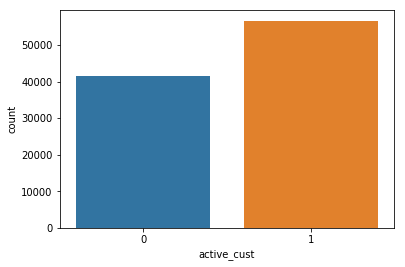

In [15]:
sns.countplot(data["active_cust"])
data["active_cust"].value_counts()

<strong><font color = "#9999ff" font = 3 size = 4>There are more than 10000 instances less in the class label "0", may be model perform well for the class label "1"(There will be more false positives).</font></strong>

# 1.7
<font color = "#DF12E9" size = 4> <u>Normalization/scaling </u>:-</font>

In [16]:

# Normalization
# Independant attributes or attribute vector
cols = ["expenditure","months_on_network","Num_complaints","number_plan_changes","relocated","monthly_bill","technical_issues_per_month","Speed_test_result"]
X = data_trimmed[cols].values
# dependant variable or the Class label
y = data_trimmed["active_cust"].values


scale = StandardScaler()
X = scale.fit_transform(X)
print(X[0:2])


[[-0.58611353  1.74148027 -0.04720944 -0.2487336  -0.38001419  0.49313349
   0.54200625  0.94444074]
 [-0.60869904  1.74148027 -0.04720944 -0.2487336  -0.38001419  0.73181305
   0.54200625  0.94444074]]


=============================================================================================================================================================================

# 2.
<U><strong><font color = "Red" size = 6> Model Implementation</font></strong></U><br>
one click on below:<br>
2.1. [Decision tree classifier](#2.1)<br>
2.2. [Random Forest Classifier](#2.2)

In [17]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


# 2.1
<font color = "#DF12E9" size = 4> <u>Decision tree classifier </u>:-</font>

In [18]:
model1 = DecisionTreeClassifier(criterion="gini")
#train the model
model1.fit(X_train,y_train)
#prediction for test data
y_Pred = model1.predict(X_test)
print("y_pred has the predicted values for x_test")

y_pred has the predicted values for x_test


# 3.
<U><strong><font color = "Red" size = 6> Model Evaluation</font></strong></U>

Accuracy of the model :  0.8649501059924513
True positive rate/sensitivity : 0.882156100208013
True negative rate/specificity : 0.8375603864734299
precision_score : 0.8853400322985825
f1 score : 0.8831215321281547
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      8139
           1       0.89      0.88      0.88     11202

    accuracy                           0.86     19341
   macro avg       0.86      0.86      0.86     19341
weighted avg       0.87      0.86      0.87     19341



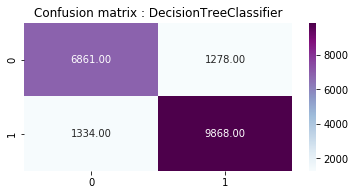

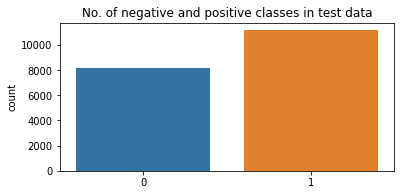

In [19]:
# Model Evaluation using confusion matrix
cm = confusion_matrix(y_test,y_Pred)
print("Accuracy of the model : ",accuracy_score(y_test,y_Pred))

# Confusion matrix
plt.figure(figsize = (6,6))
plt.subplot(2,1,1)
plt.title("Confusion matrix : DecisionTreeClassifier")
sns.heatmap(cm,annot = True,cmap="BuPu",fmt=".2f")

# Countplot
plt.figure(figsize = (6,6))
plt.subplot(2,1,2)
plt.title("No. of negative and positive classes in test data")
# Countplot to check the class imbalance
sns.countplot(y_test)

# Performance metrics
sensitivity = (9754/(9754+1303))
print("True positive rate/sensitivity :",sensitivity)
specificity = (6935/(1345+6935))
print("True negative rate/specificity :",specificity)
precision = precision_score(y_test,y_Pred)
print("precision_score :", precision)
F1_score = f1_score(y_test,y_Pred)
print("f1 score :",F1_score)
print("====================================================")
print(classification_report(y_test,y_Pred))


$Accuracy = (TP+TN)\div(TP+TN+FP+FN) = 0.86$<br>
$Precision = TP\div(TP+FP) = 0.88$<br>
$Recall = TP\div(TP+FN) = 0.87$ <br>
$F-score = (2 \times precision \times recall)\div (precision+recall) = 0.87$

<font color = "#00cccc" size = 5><u> Observations: </u></font>
<strong><font color = "#9999ff" size = 3>
1. Class of interest "0" has less precision because of the class imbalance problem that i have depicted before in the preprocessing part.
2. True negative rate is the proportion of the negative tuples that are correctly predicted(83 percent of the negative classes are predicted correctly).
3. True positive rate is the proportion of the positive tuples that are correctly predicted(88 percent of the positive classes are predicted correcly).
4. Accuracy of the model is 0.86 for decicision tree classifier.

Let's use the emsemble method(RandomForestClassifier) and check the accuracy.




# 2.2
<font color = "#DF12E9" size = 4> <u>Random Forest Classifier </u>:-</font>

Accuracy of the model:  0.8958171759474691
              precision    recall  f1-score   support

           0       0.89      0.86      0.87      8139
           1       0.90      0.92      0.91     11202

    accuracy                           0.90     19341
   macro avg       0.89      0.89      0.89     19341
weighted avg       0.90      0.90      0.90     19341



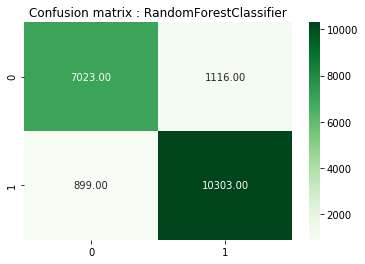

In [20]:
# Model implementation : RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20, criterion= "gini")
#train
model.fit(X_train,y_train)
y_Pred = model.predict(X_test)

#Evaluation of the Random forest classifier 
cm = confusion_matrix(y_test,y_Pred)
print("Accuracy of the model: ",accuracy_score(y_test,y_Pred))
plt.figure(figsize = (6,4))
plt.title("Confusion matrix : RandomForestClassifier")
sns.heatmap(cm,annot = True,cmap="Greens",fmt=".2f")


# Model evaluation
print(classification_report(y_test,y_Pred))


<font color = "#00cccc" size = 5><u> Observations: </u></font>

<strong><font color = "#9999ff" size = 3>
1. Accuracy has improved when compare to the single estimator decision tree classifier.
2. There are 20 estimators are used in RandomForestClassifier to predict the class labels.

# ********END******